<a href="https://colab.research.google.com/github/Juacardonaca/SyS2025-II/blob/main/Parcial1_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parcial 1: Señales y Sistemas 2025-II

 ## Profesor: Andrés Marino Álvarez Meza, Ph.D.


## Departamento de Ingeniería Eléctrica, Electrónica, y Computación
## Universidad Nacional de Colombia - sede Manizales

#Pregunta 1

In [27]:
import sympy as sp

# Variables
t, T0, r = sp.symbols('t T0 r', positive=True, real=True)
A, B = sp.symbols('A B', positive=True, real=True)
n, m = sp.symbols('n m', integer=True)
w0 = 2*sp.pi/T0

# Señales
x1 = A*sp.exp(-sp.I*n*w0*t)
x2 = B*sp.exp(sp.I*m*w0*t)
resta = x1 - x2

# |x1 - x2|^2
expr = sp.simplify(resta * sp.conjugate(resta))

# CASO 1: n = -m
expr_caso1 = expr.subs(n, -m)
integral_caso1 = sp.integrate(expr_caso1, (t, 0, T0))
d2_caso1 = sp.simplify(integral_caso1/T0)

# CASO 2: n ≠ -m (dejamos n y m distintos)  da 0 la integral, por lo tanto el resultado serían las constantes que quedan fuera del término cruzado (A+B)^2
r = m+n
expr_cross = sp.exp(-sp.I*(r)*w0*t)
expr_caso2 = expr.subs(n+m, r)
integral_caso2 = sp.integrate(expr_caso2, (t, 0, T0))
d2_case2 = sp.simplify(integral_caso2/T0)

print("Distancia si n = -m ->", d2_caso1)
print("Distancia si n ≠ -m ->", d2_case2)


Distancia si n = -m -> (A - B)**2
Distancia si n ≠ -m -> 0


# Pregunta 2

Encuentre la señal en tiempo disctreto al utilizar un conversor análogo digital con frecuencia de muestreo de 5Khz y 4 bits de capacidad de representación, aplicada a la señal continua: $x(t) = 3 \cos(1000\pi t) + 5 \sin(3000\pi t) + 10 \cos(11000\pi t)$
Realizar la simulación del proceso de discretización (incluyendo al menos tres periodos de x(t)). En casi de que la discretización no sea apropiada, diseñe e implemente un conversor adecuado para la señal estudiada.


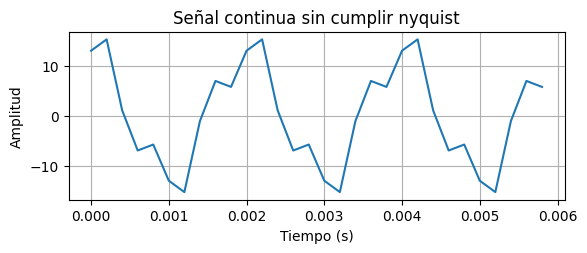

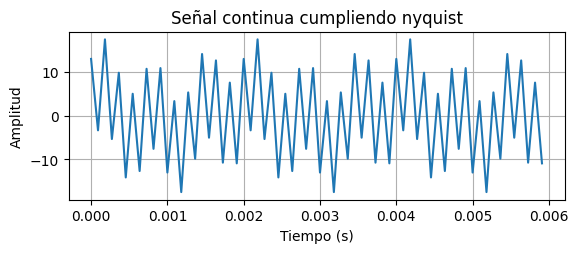

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist #librería para calcular distancias entre puntos

#Damos las amplitudes de la señal continua x(t) = A*cos(wt)
A1 = 3
A2 = 5
A3 = 10

#frecuencias angulares de las señales
w1 = 1000*np.pi
w2 = 3000*np.pi
w3 = 11000*np.pi

#periodo de las señales dado por T = (2*pi)/w
T1 = 2*np.pi/w1
T2 = 2*np.pi/w2
T3 = 2*np.pi/w3

#frecuencias de las señales F = w/2*pi
f1 = w1/(2*np.pi)
f2 = w2/(2*np.pi)
f3 = w3/(2*np.pi)

#Frecuencia de muestreo del ejercicio no cumple el teorema de nyquist
fs = 5000
fa = 2*f3 #cumpliendo teorema de nyquist

#periodo de muestreo
Ts = 1/fs
Ta = 1/fa

#creamos los tiempos iniciales de la funcion
ti = 0
tf = 3*T1 #De la señal con periodo más alto (o sea más lento)

#creamos el vector de tiempo con arange, el arange nos da los saltos
tv = np.arange(ti,tf,Ts)
tx = np.arange(ti,tf,Ta)

#Ahora creamos la señal continua
x = A1*np.cos(w1*tv) + A2*np.sin(w2*tv) + A3*np.cos(w3*tv)
y = A1*np.cos(w1*tx) + A2*np.sin(w2*tx) + A3*np.cos(w3*tx)

plt.subplot(2,1,1)
plt.plot(tv,x) #grafica de la señal continua
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal continua sin cumplir nyquist')
plt.grid()
plt.show()

plt.subplot(2,1,2)
plt.plot(tx,y) #grafica de la señal discretizada
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal continua cumpliendo nyquist')
plt.grid()
plt.show()

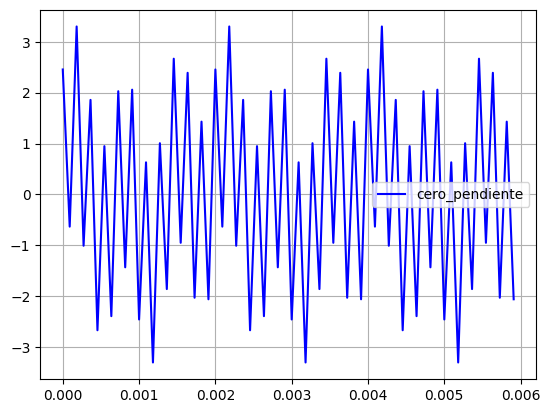

In [29]:
#Le doy los límites a mi señal de cero y pendiente
def my_ceropen(x,ymin = -5, ymax = 5):


  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv

#Recordar que el cero centra mi señal a un punto de referencia, y la pendiente modela la forma de la onda para su digitalización
xcp = my_ceropen(y,ymin=-3.3,ymax=3.3).reshape(-1,1)
plt.plot(tx,xcp, c= 'blue', label= 'cero_pendiente')
plt.legend()
plt.grid()
plt.show()

In [30]:
nbits = 4 #Los bits determinan cuántos niveles de cuantización puede representar el ADC
num_est = 2**nbits
ymin = -3.3
ymax = 3.3
res = (ymax-ymin)/num_est
vq = np.linspace(ymin, ymax, num_est)
vq

array([-3.3 , -2.86, -2.42, -1.98, -1.54, -1.1 , -0.66, -0.22,  0.22,
        0.66,  1.1 ,  1.54,  1.98,  2.42,  2.86,  3.3 ])

In [31]:
def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]

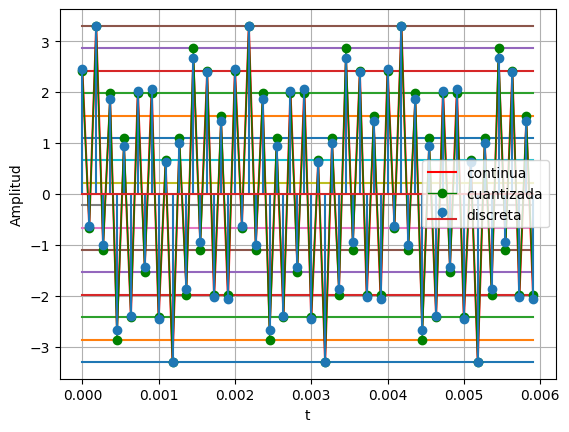

In [32]:
for v in vq:
  plt.plot(tx,v*np.ones(len(tx)))


for i in range(xcp.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(xcp[i],vq)
   else:
     yq = np.append(yq,my_cuantizador(xcp[i],vq))


plt.plot(tx, xcp, c='r', label='continua')
plt.plot(tx, yq, c='g', marker='o', label='cuantizada', linewidth=1) #ya que nos da el conversor analogo digital
plt.stem(tx, xcp, label='discreta')
plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()

# Pregunta 4

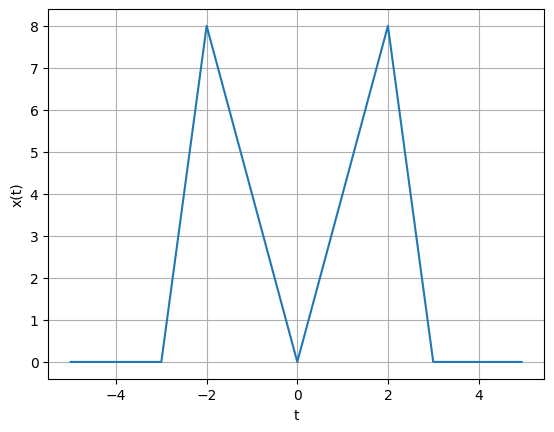

In [33]:
import numpy as np

T = 10 # intervalo de la señal
A = 8 #altura de la señal
d1 = 2
d2 = 3
Fs = 200*1/T # frecuencia muestreo
Ts = 1/Fs # periodo de muestreo
t = np.arange(-T/2,T/2,Ts)
x = np.zeros(len(t))

x[(t>=-d2) & (t<-d1)] = (A/(d2-d1))*(t[(t >= -d2) & (t < -d1)] + d2)
x[(t>=-d1) & (t<0)] = A - (A/d1)*(t[(t >= -d1) & (t < 0)] + d1)
x[(t>=0) & (t<d1)] = (A/d1)*t[(t >= 0) & (t < d1)]
x[(t>=d1) & (t<d2)] = A - (A/(d2-d1))*(t[(t >= d1) & (t < d2)] - d1)

import matplotlib.pyplot as plt
plt.plot(t,x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.show()


In [34]:
x2 = np.gradient(np.gradient(x, Ts), Ts) #Segunda derivada de la señal
N = 5 #numero armonicos
wo = 2*np.pi/T # frecuencia fundamental
# definir bases
Nm = len(t)
phin = np.zeros((Nm,2*N+1),dtype=np.complex128)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*t)#base de fourier en el intervalo de interés

/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


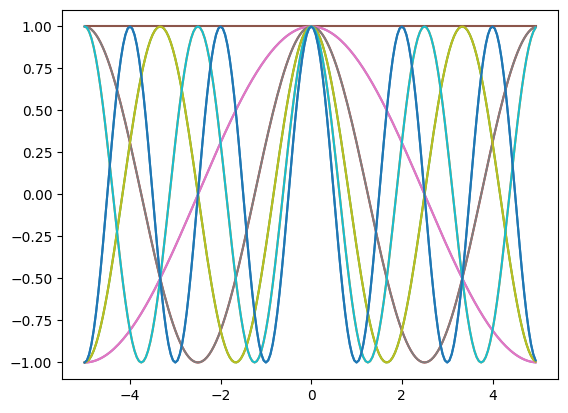

In [35]:
plt.plot(t,phin)
plt.show()

/tmp/ipython-input-1630266833.py:6: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integral = np.trapz(x2 * exp_term, t)
/tmp/ipython-input-1630266833.py:10: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  coeficientes_segunda_derivada[i] = np.trapz(x, t) / T   # término DC
/tmp/ipython-input-1630266833.py:15: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  coeficientes[i] = (1/T) * np.trapz(x * exp_term, t)


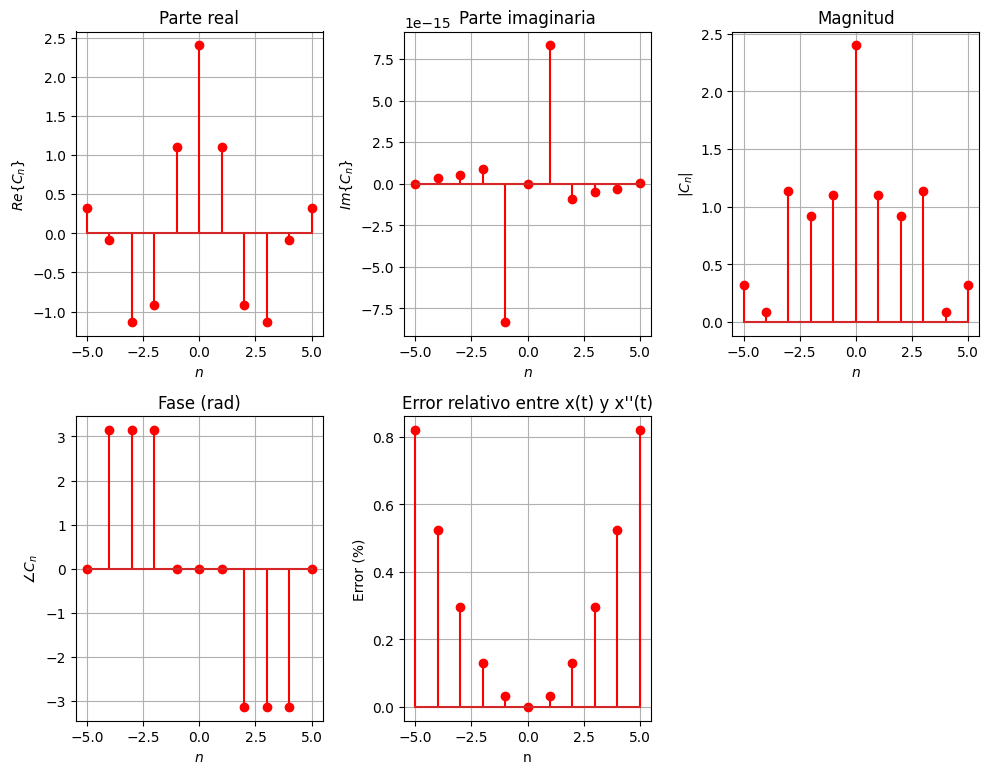

In [36]:
coeficientes_segunda_derivada = np.zeros(2*N+1, dtype=np.complex128)
nv = np.linspace(-N, N, 2*N+1)

for i, n in enumerate(nv):
    exp_term = np.exp(-1j * n * wo * t)
    integral = np.trapz(x2 * exp_term, t)
    if n != 0:
        coeficientes_segunda_derivada[i] = integral / ((-n**2) * (wo**2) * T)
    else:
        coeficientes_segunda_derivada[i] = np.trapz(x, t) / T   # término DC

coeficientes = np.zeros(2*N+1, dtype=np.complex128)
for i, n in enumerate(nv):
    exp_term = np.exp(-1j * n * wo * t)
    coeficientes[i] = (1/T) * np.trapz(x * exp_term, t)

error_relativo = np.abs((coeficientes - coeficientes_segunda_derivada) / coeficientes) * 100
# Graficar espectro
fig = plt.figure(figsize=(10,8))

plt.subplot(2,3,1)
plt.stem(nv, np.real(coeficientes_segunda_derivada), 'r')
plt.xlabel(r'$n$')
plt.ylabel(r'$Re\{C_n\}$')
plt.title('Parte real')
plt.grid()

plt.subplot(2,3,2)
plt.stem(nv, np.imag(coeficientes_segunda_derivada), 'r')
plt.xlabel(r'$n$')
plt.ylabel(r'$Im\{C_n\}$')
plt.title('Parte imaginaria')
plt.grid()

plt.subplot(2,3,3)
plt.stem(nv, np.abs(coeficientes_segunda_derivada), 'r')
plt.xlabel(r'$n$')
plt.ylabel(r'$|C_n|$')
plt.title('Magnitud')
plt.grid()

plt.subplot(2,3,4)
plt.stem(nv, np.angle(coeficientes_segunda_derivada), 'r')
plt.xlabel(r'$n$')
plt.ylabel(r'$\angle C_n$')
plt.title('Fase (rad)')
plt.grid()

plt.subplot(2,3,5)
plt.stem(nv, error_relativo, 'r')
plt.xlabel('n')
plt.ylabel('Error (%)')
plt.title('Error relativo entre x(t) y x\'\'(t)')
plt.grid()

plt.tight_layout()
plt.show()